In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

data_path = r'/content/drive/MyDrive/combined_df.csv'
df = pd.read_csv(data_path)

In [4]:
X = df.drop(columns=['timestamp', 'label'], errors='ignore')

df_sampled = X.sample(frac=0.005, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sampled)

In [8]:
agg_clust = AgglomerativeClustering(n_clusters=6)
labels = agg_clust.fit_predict(X_scaled)

In [9]:
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.2466924502298852


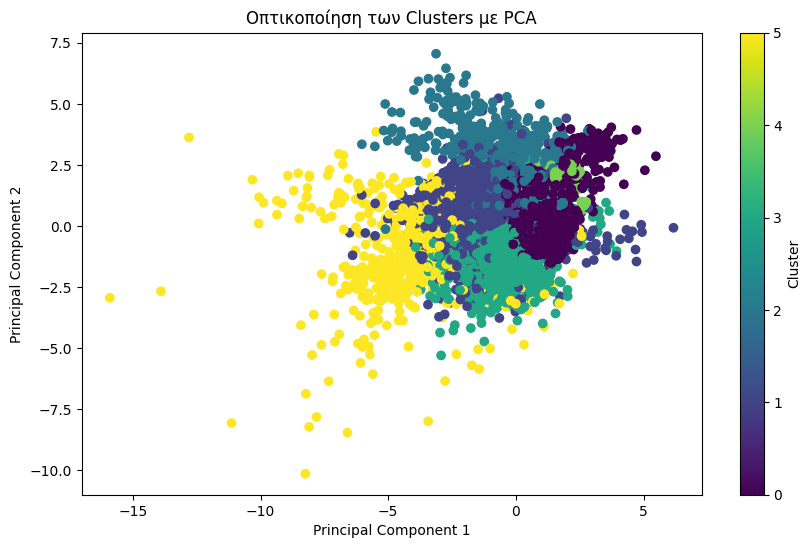

In [10]:
# Οπτικοποίηση με PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Οπτικοποίηση των Clusters με PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [11]:
# Προσθήκη των ετικετών στο dataframe
df_sampled['Cluster'] = labels

# Δημιουργία πίνακα σύνοψης
df_sampled['label'] = df.loc[df_sampled.index, 'label']

cluster_summary = pd.crosstab(df_sampled['label'], df_sampled['Cluster'], margins=True)
print("Πίνακας Κατανομής Δραστηριοτήτων στα Clusters:")
print(cluster_summary)

Πίνακας Κατανομής Δραστηριοτήτων στα Clusters:
Cluster      0     1     2     3    4    5    All
label                                            
1          433  3282    24  1962    0  291   5992
2          183   299   403   121    0  442   1448
3           21   385     1   797    0    4   1208
4           17   205     1   151    0    7    381
5           10   192     4   110    0    8    324
6           34  1360     0  2335    0    2   3731
7        14285    68   204    30    0    0  14587
8          454     0  1144     2  555    0   2155
13         279   661     2   997    0    6   1945
14          37   128     2    95    0   17    279
130          6    95     0   113    0    0    214
140          3    35     0     5    0    0     43
All      15762  6710  1785  6718  555  777  32307
